In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, LSTM

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [2]:
train_data = []

for root, subdirs, files in os.walk('train'):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                train_data.append((label, resampled))

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [3]:
test_data = []

for root, subdirs, files in os.walk('test'):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                test_data.append((label, resampled))

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [4]:
print(train_data[0])

('arrow', array([[-1.92962181,  1.98472317],
       [-2.08909504,  2.01519254],
       [-1.977915  ,  1.93380714],
       [-1.89266034,  1.83253328],
       [-1.79224377,  1.74529564],
       [-1.71172043,  1.62713002],
       [-1.52922487,  1.47180348],
       [-1.38360778,  1.32150113],
       [-1.11811431,  1.087088  ],
       [-0.94785114,  0.93369177],
       [-0.82791042,  0.78400149],
       [-0.57433998,  0.54433185],
       [-0.32621618,  0.29756636],
       [-0.06329263,  0.06076073],
       [ 0.15399735, -0.22433129],
       [ 0.38994471, -0.42376626],
       [ 0.49624023, -0.51421433],
       [ 0.6742036 , -0.70878699],
       [ 0.79321166, -0.76902574],
       [ 0.94300431, -0.92489224],
       [ 0.97931841, -0.94629585],
       [ 1.05465631, -0.96783279],
       [ 0.9389439 , -0.88307566],
       [ 0.85807146, -0.77397219],
       [ 0.5798533 , -0.66685564],
       [ 0.3421663 , -0.54295617],
       [ 0.14537994, -0.48947048],
       [ 0.03969544, -0.46827503],
       [-0

In [5]:
# Prepare the data
labels = [sample[0] for sample in train_data]

print(set(labels))

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

print(set(labels_encoded))

y = to_categorical(labels_encoded)

print(len(y[0]))

sequences = [sample[1] for sample in train_data]
X = np.array(sequences)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

{'arrow', 'left_curly_brace', 'question_mark', 'triangle', 'x', 'right_sq_bracket', 'left_sq_bracket', 'caret', 'check', 'star', 'v', 'right_curly_brace', 'delete_mark', 'circle', 'rectangle', 'pigtail'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
16
(3069, 50, 2) (768, 50, 2) (3069, 16) (768, 16)


In [6]:
def define_and_train_model(labels, X_train, X_test, y_train, y_test, units_parameter):
    # Define the model
    model = Sequential()

    # add LSTM layer
    # input shape is (length of an individual sample, dimensions of the sample)
    # in our case: two dimensions, as we have X and Y coordinates
    model.add(LSTM(units_parameter, input_shape=(NUM_POINTS, 2)))

    # add dense layer to do machine learning magic
    model.add(Dense(32, activation='relu'))

    # here, you can add more layers and maybe a dropout for better performance

    # softmax layer for classification
    model.add(Dense(len(set(labels)), activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
    stop_early = EarlyStopping(monitor='val_loss', patience=3)
    
    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1,
        callbacks=[reduce_lr, stop_early]
    )
    
    model.summary()
    return model, history

In [7]:
model_128_unit, history_128_unit = define_and_train_model(labels, X_train, X_test, y_train, y_test, 128)

Epoch 1/20
96/96 [==============================] - 8s 53ms/step - loss: 1.5296 - accuracy: 0.4923 - val_loss: 0.6233 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 2/20
96/96 [==============================] - 5s 47ms/step - loss: 0.4223 - accuracy: 0.8710 - val_loss: 0.2717 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 3/20
96/96 [==============================] - 4s 46ms/step - loss: 0.2081 - accuracy: 0.9273 - val_loss: 0.1315 - val_accuracy: 0.9570 - lr: 0.0010
Epoch 4/20
96/96 [==============================] - 4s 45ms/step - loss: 0.1878 - accuracy: 0.9378 - val_loss: 0.0828 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 5/20
96/96 [==============================] - 4s 46ms/step - loss: 0.0943 - accuracy: 0.9746 - val_loss: 0.1348 - val_accuracy: 0.9518 - lr: 0.0010
Epoch 6/20
96/96 [==============================] - 6s 65ms/step - loss: 0.1062 - accuracy: 0.9677 - val_loss: 0.1076 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 7/20
96/96 [==============================] - 5s 48ms/step - loss: 0.0

In [8]:
model_64_unit, history_64_unit = define_and_train_model(labels, X_train, X_test, y_train, y_test, 64)

Epoch 1/20
96/96 [==============================] - 6s 30ms/step - loss: 1.8356 - accuracy: 0.4444 - val_loss: 0.7971 - val_accuracy: 0.8294 - lr: 0.0010
Epoch 2/20
96/96 [==============================] - 2s 25ms/step - loss: 0.4750 - accuracy: 0.8853 - val_loss: 0.2598 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 3/20
96/96 [==============================] - 2s 25ms/step - loss: 0.2181 - accuracy: 0.9394 - val_loss: 0.1444 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 4/20
96/96 [==============================] - 2s 26ms/step - loss: 0.1312 - accuracy: 0.9684 - val_loss: 0.1151 - val_accuracy: 0.9609 - lr: 0.0010
Epoch 5/20
96/96 [==============================] - 3s 28ms/step - loss: 0.0980 - accuracy: 0.9736 - val_loss: 0.0767 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/20
96/96 [==============================] - 3s 26ms/step - loss: 0.0724 - accuracy: 0.9818 - val_loss: 0.1510 - val_accuracy: 0.9414 - lr: 0.0010
Epoch 7/20
96/96 [==============================] - 2s 24ms/step - loss: 0.0

In [9]:
model_32_unit, history_32_unit = define_and_train_model(labels, X_train, X_test, y_train, y_test, 32)

Epoch 1/20
96/96 [==============================] - 7s 33ms/step - loss: 2.2384 - accuracy: 0.3571 - val_loss: 1.4386 - val_accuracy: 0.6016 - lr: 0.0010
Epoch 2/20
96/96 [==============================] - 2s 22ms/step - loss: 0.8247 - accuracy: 0.7732 - val_loss: 0.4018 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 3/20
96/96 [==============================] - 2s 23ms/step - loss: 0.2941 - accuracy: 0.9273 - val_loss: 0.2015 - val_accuracy: 0.9518 - lr: 0.0010
Epoch 4/20
96/96 [==============================] - 2s 24ms/step - loss: 0.1340 - accuracy: 0.9717 - val_loss: 0.0682 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 5/20
96/96 [==============================] - 2s 23ms/step - loss: 0.0764 - accuracy: 0.9840 - val_loss: 0.0602 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 6/20
96/96 [==============================] - 2s 23ms/step - loss: 0.0764 - accuracy: 0.9834 - val_loss: 0.0317 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 7/20
96/96 [==============================] - 2s 22ms/step - loss: 0.0

In [10]:
model_16_unit, history_16_unit = define_and_train_model(labels, X_train, X_test, y_train, y_test, 16)

Epoch 1/20
96/96 [==============================] - 8s 39ms/step - loss: 2.4810 - accuracy: 0.1711 - val_loss: 2.0720 - val_accuracy: 0.2292 - lr: 0.0010
Epoch 2/20
96/96 [==============================] - 2s 23ms/step - loss: 1.5902 - accuracy: 0.4780 - val_loss: 1.1860 - val_accuracy: 0.6589 - lr: 0.0010
Epoch 3/20
96/96 [==============================] - 2s 22ms/step - loss: 0.8942 - accuracy: 0.7638 - val_loss: 0.6391 - val_accuracy: 0.8372 - lr: 0.0010
Epoch 4/20
96/96 [==============================] - 2s 21ms/step - loss: 0.5326 - accuracy: 0.8400 - val_loss: 0.4133 - val_accuracy: 0.8685 - lr: 0.0010
Epoch 5/20
96/96 [==============================] - 2s 19ms/step - loss: 0.3756 - accuracy: 0.8866 - val_loss: 0.3075 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 6/20
96/96 [==============================] - 2s 18ms/step - loss: 0.2919 - accuracy: 0.9231 - val_loss: 0.2340 - val_accuracy: 0.9518 - lr: 0.0010
Epoch 7/20
96/96 [==============================] - 2s 18ms/step - loss: 0.2

In [11]:
model_8_unit, history_8_unit = define_and_train_model(labels, X_train, X_test, y_train, y_test, 8)

Epoch 1/20
96/96 [==============================] - 7s 31ms/step - loss: 2.6027 - accuracy: 0.1720 - val_loss: 2.3962 - val_accuracy: 0.3112 - lr: 0.0010
Epoch 2/20
96/96 [==============================] - 2s 24ms/step - loss: 2.0198 - accuracy: 0.4513 - val_loss: 1.6261 - val_accuracy: 0.5299 - lr: 0.0010
Epoch 3/20
96/96 [==============================] - 2s 24ms/step - loss: 1.3185 - accuracy: 0.6468 - val_loss: 1.0444 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 4/20
96/96 [==============================] - 2s 25ms/step - loss: 0.8889 - accuracy: 0.7344 - val_loss: 0.7270 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 5/20
96/96 [==============================] - 2s 23ms/step - loss: 0.6551 - accuracy: 0.7928 - val_loss: 0.5526 - val_accuracy: 0.7865 - lr: 0.0010
Epoch 6/20
96/96 [==============================] - 2s 22ms/step - loss: 0.5231 - accuracy: 0.8244 - val_loss: 0.4626 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 7/20
96/96 [==============================] - 3s 32ms/step - loss: 0.4

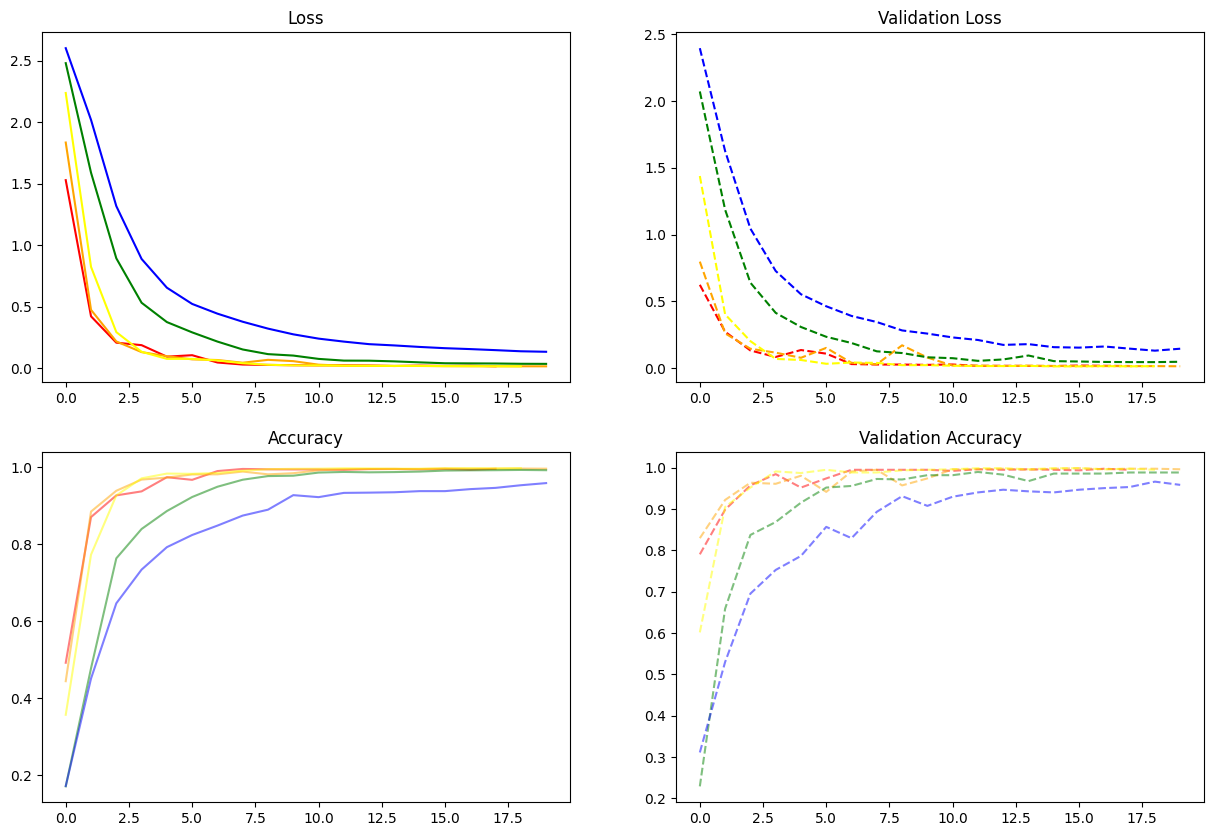

In [15]:
def visualisation_histories(histories):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    colors = ["red", "orange", "yellow", "green", "blue"]
    for history in histories:
        
        index = histories.index(history) # get index of an element: https://www.geeksforgeeks.org/python-list-index/
        
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']        
        
        axs[0, 0].plot(loss, color=colors[index]) 
        axs[0, 1].plot(val_loss, '--', color=colors[index])
        axs[1, 0].plot(accuracy, color=colors[index], alpha=0.5)
        axs[1, 1].plot(val_accuracy, '--', color=colors[index], alpha=0.5)
        
        axs[0, 0].set_title("Loss")
        axs[0, 1].set_title("Validation Loss")
        axs[1, 0].set_title("Accuracy")
        axs[1, 1].set_title("Validation Accuracy")
        
visualisation_histories([history_128_unit, history_64_unit, history_32_unit, history_16_unit, history_8_unit])

In [22]:
def evaluate_models(models):
    for model in models:
        score = model.evaluate(X_test, y_test, verbose=0)
